# Imports and Reading in Data

In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import altair as alt

In [7]:
def custom(data):
    return alt.pipe(data, alt.to_json(
        base_url='https://data301.calpolydatascience.org/user/royzawadzki'
    ))

In [8]:
alt.data_transformers.register('custom', custom)
alt.data_transformers.enable('custom')

In [9]:
kickstarter = pd.read_csv("/data/royzawadzki/kickstarter.csv", parse_dates = ["deadline", "launched"])

In [10]:
kickstarter.dtypes

Unnamed: 0                  int64
ID                          int64
name                       object
category                   object
main_category              object
currency                   object
deadline           datetime64[ns]
goal                      float64
launched           datetime64[ns]
pledged                   float64
state                      object
backers                     int64
country                    object
usd pledged               float64
goal_log                  float64
backers_log               float64
usd pledged_log           float64
duration                    int64
season                     object
month                      object
month_number                int64
season_number               int64
dtype: object

In [11]:
kickstarter.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,country,usd pledged,goal_log,backers_log,usd pledged_log,duration,season,month,month_number,season_number
0,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,...,US,100.0,10.308953,2.708050,4.605170,59,Fall,September,9,4
1,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,...,US,220.0,10.714418,1.098612,5.393628,44,Winter,January,1,1
2,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,...,US,1.0,8.517193,0.000000,0.000000,29,Spring,March,3,2
3,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,...,US,52375.0,10.819778,5.411646,10.866185,34,Winter,February,2,1
4,6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,...,US,1205.0,6.907755,2.772589,7.094235,19,Winter,December,12,1


So Altair does not crash the browser tab, all graphs using Altair will be made using the below sample.

In [12]:
kickstarter_sample = kickstarter.sample(20000)

# Basic EDA

### Overview of Success and Failure

In [82]:
counts_state = kickstarter.groupby("state")["state"].count()
total = counts_state["successful"] + counts_state["failed"]
print("Percent Success: ", round(counts_state["successful"]/ total * 100, 2) , "%")
print("Percent Failure: ", round(counts_state["failed"]/ total * 100, 2), "%")

Percent Success:  47.27 %
Percent Failure:  52.73 %


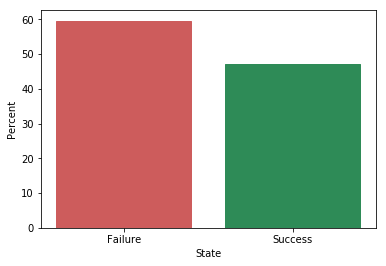

In [102]:
state_data = {"Success": round(counts_state["successful"]/ total * 100, 2), 
              "Failure": 59.62 }

barlist = plt.bar(list(state_data.keys()), list(state_data.values()))
barlist[1].set_color("indianred")
barlist[0].set_color("seagreen")
plt.xlabel("State")
plt.ylabel("Percent")
plt.show()

Suprisingly, there are a lot of successful kickstarters as seen by the barchart above. About 47% of kickstarters succeed and 53% fail, after filtering out those that had a status other than success or failure. Part of the reason why these numbers are so close together is because we filtered out the observations with zero backers and zero usd pledged. Even before that though, the numbers were about 40% and 60% for success and failure, respectively.

### Overview of Kickstarter Categories and Main Categories

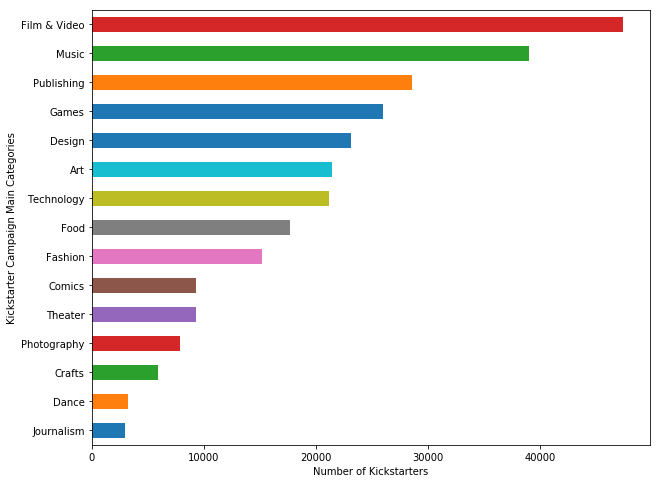

In [101]:
counts_maincat = kickstarter.groupby("main_category")["main_category"].count().sort_values()
counts_maincat.plot.barh(figsize = (10,8))
plt.xlabel("Number of Kickstarters")
plt.ylabel("Kickstarter Campaign Main Categories")
plt.show()

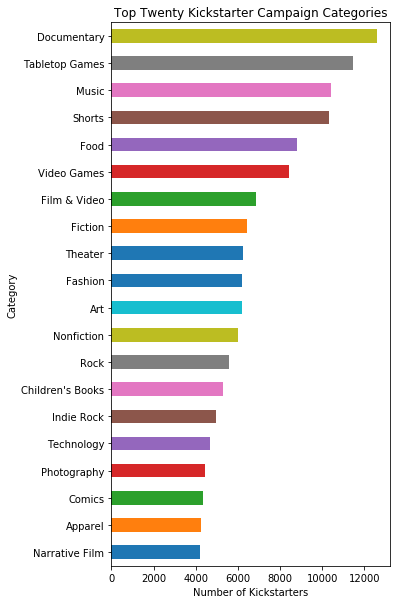

In [100]:
counts_subcat_top_twenty = kickstarter.groupby("category")["category"].count().sort_values()[-21:-1]
counts_subcat_top_twenty.plot.barh(figsize = (5,10))
plt.title("Top Twenty Kickstarter Campaign Categories")
plt.xlabel("Number of Kickstarters")
plt.ylabel("Category")
plt.show()

### Duration of Kickstarter Campaigns

In [45]:
kickstarter["duration"].describe()

count    277905.000000
mean         32.862090
std          12.520907
min           0.000000
25%          29.000000
50%          29.000000
75%          35.000000
max          91.000000
Name: duration, dtype: float64

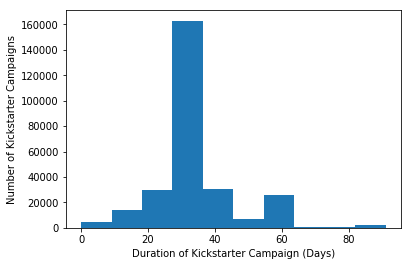

In [138]:
plt.hist("duration", data = kickstarter)
plt.xlabel("Duration of Kickstarter Campaign (Days)")
plt.ylabel("Number of Kickstarter Campaigns")
plt.show()

Most kickstarter campaigns seem to have a similar duration of around one month.

### Kickstarters and Time of the Year

In [13]:
alt.Chart(kickstarter_sample).mark_bar().encode(
    alt.X("season", sort = alt.SortField(field = "season_number", op = "min")),
    alt.Y("count(*):Q")
).properties(width = 300, height = 500)

<VegaLite 2 object>

We see that the number of Kickstarters launched dips signficantly during the Winter months and goes back to a homogenous level that is Fall, Spring, and Summer.

In [10]:
alt.Chart(kickstarter_sample).mark_bar().encode(
    alt.X("month", sort = alt.SortField(field = "month_number", op = "min")),
    alt.Y("count(*):Q")
)

<VegaLite 2 object>

The trend above is similar to the trend seen with these seasons.

### Associations Between Variables

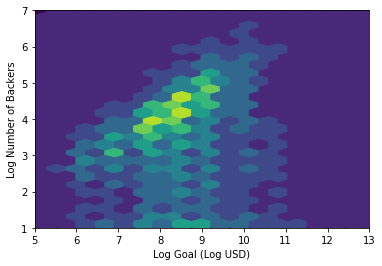

In [140]:
plt.hexbin(kickstarter["goal_log"], kickstarter["backers_log"], gridsize = 50, bins = 10)
plt.xlim(5,13)
plt.xlabel("Log Goal (Log USD)")
plt.ylim(1,7)
plt.ylabel("Log Number of Backers")
plt.show()

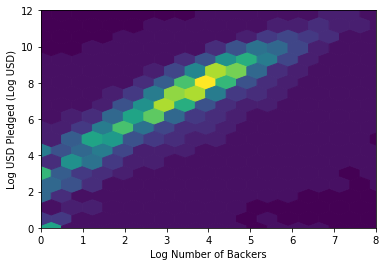

In [142]:
plt.hexbin(kickstarter["backers_log"], kickstarter["usd pledged_log"], gridsize = 25, bins = 25)
plt.xlim(0,8)
plt.xlabel("Log Number of Backers")
plt.ylim(0,12)
plt.ylabel("Log USD Pledged (Log USD)")
plt.show()

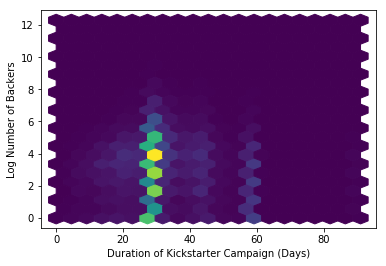

In [144]:
plt.hexbin(kickstarter["duration"], kickstarter["backers_log"], gridsize = 20)
plt.xlabel("Duration of Kickstarter Campaign (Days)")
plt.ylabel("Log Number of Backers")
plt.show()

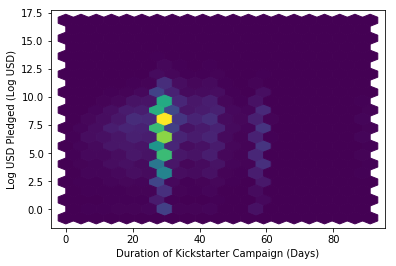

In [145]:
plt.hexbin(kickstarter["duration"], kickstarter["usd pledged_log"], gridsize = 20)
plt.xlabel("Duration of Kickstarter Campaign (Days)")
plt.ylabel("Log USD Pledged (Log USD)")
plt.show()

The only significant association that we were able to find using these heatmaps was that backers was strongly and positively associated with USD pledged. This reveals that the majority of the backers in a kickstarter project do not pledge a lot of money. If the goal of the kickstarter is high one can expect to need a lot of backers.

### Comparison of Kickstarter Campaign Outcome by Origin (CHANGE TITLE AND MOVE UPWARDS)

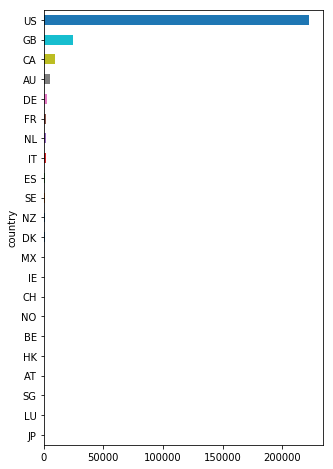

In [230]:
kickstarter.groupby(["country"])["country"].count().sort_values().plot.barh(figsize = (5,8))

We can observe that an overwhelming amount of the kickstarters come from the United States from this table.

#### Do any Factors Differ by Country?

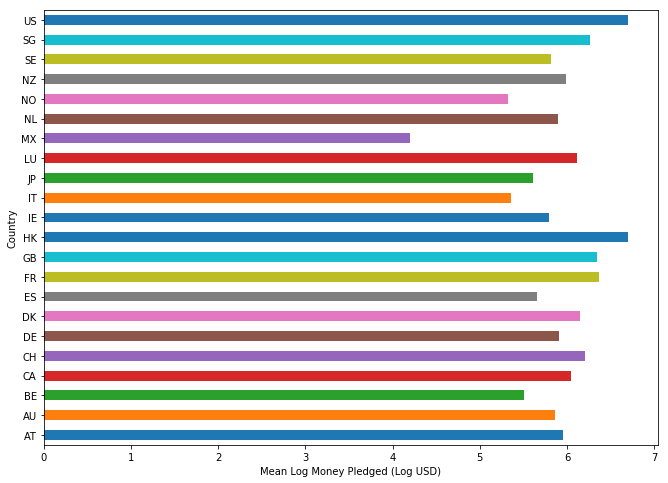

In [157]:
kickstarter.groupby(["country"])["usd pledged_log"].mean().plot.barh(figsize = (11,8))
plt.xlabel("Mean Log Money Pledged (Log USD)")
plt.ylabel("Country")
plt.show()

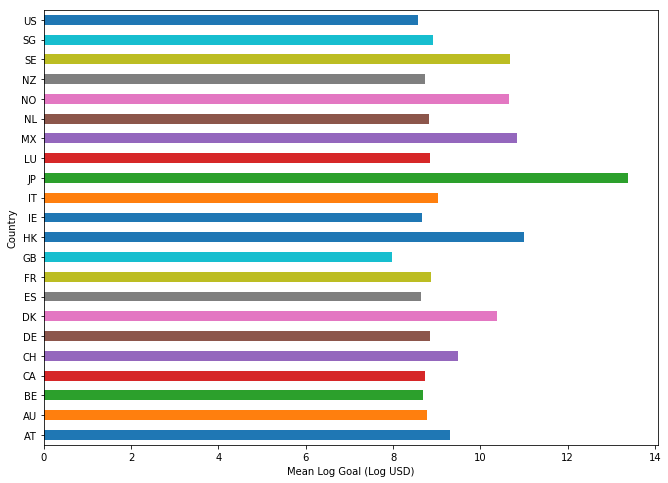

In [155]:
kickstarter.groupby(["country"])["goal_log"].mean().plot.barh(figsize = (11,8))
plt.xlabel("Mean Log Goal (Log USD)")
plt.ylabel("Country")
plt.show()

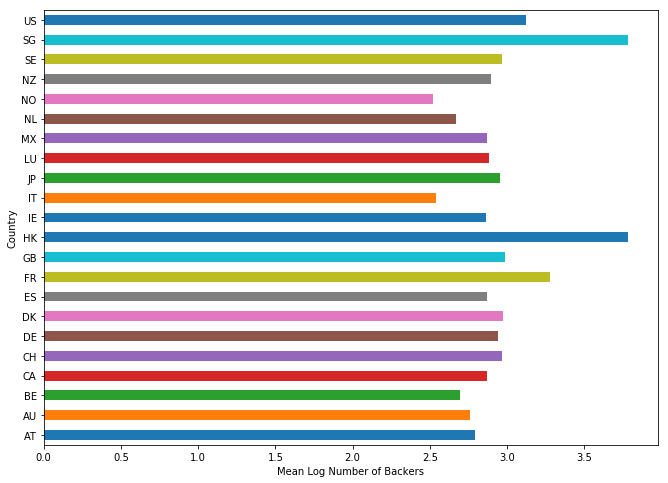

In [154]:
kickstarter.groupby(["country"])["backers_log"].mean().plot.barh(figsize = (11,8))
plt.xlabel("Mean Log Number of Backers")
plt.ylabel("Country")
plt.show()

Nothing seems to differ by country to an extreme degree.

# Comparison of Successful and Failed Kickstarters

The focus of this section is to split the dataframe into two groups, successful and failed kickstarter campaigns, and compare how certain features such as category differs between the different outcomes of the campaign. The primary motivation for this analysis is for it to help us select predictors for the models soon to be built.

In [94]:
success = kickstarter[kickstarter["state"] == "successful"]
failed = kickstarter[kickstarter["state"] == "failed"]

### Frequency of Kickstarter Outcome by Main Categories

In [88]:
categories_success = success["main_category"].value_counts().sort_values()
categories_failed = failed["main_category"].value_counts().sort_values()

In [223]:
alt.Chart(kickstarter_sample).mark_bar().encode(
    alt.X("state:N"),
    alt.Y("count(*):Q"),
    column = "main_category:N",
    color = alt.Color("state:N", scale = alt.Scale(range=["red", "green"]))
)

<VegaLite 2 object>

There seems to be a bit of difference in the ranking of the categories in the Kickstarters that fail compared to the Kickstarter that succeed. The games category, for example, ranks higher for successes than for failures. Technology has significantly more failures than it does successes. In addition, music has alot more failures than successes. 

### Comparison of Kickstarter Campaign Outcome by Goals

In [68]:
goal_success = success["goal_log"]
goal_failed = failed["goal_log"]

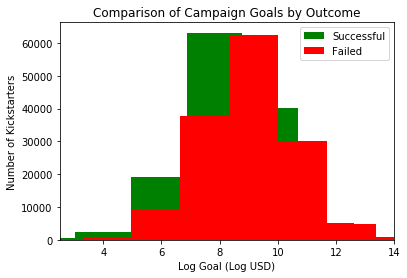

In [106]:
plt.hist(goal_success, color = "green", label = "Successful")
plt.hist(goal_failed, color = "red", label = "Failed")
plt.xlim(2.5, 14)
plt.title("Comparison of Campaign Goals by Outcome")
plt.xlabel("Log Goal (Log USD)")
plt.ylabel("Number of Kickstarters")
plt.legend()
plt.show()

In [61]:
ttest_ind(success["goal_log"], failed["goal_log"])

Ttest_indResult(statistic=-136.54334716731782, pvalue=0.0)

There appears to be a significant difference in the distributions as the p-value in the two-sample t test is extremely small.

### Comparison of Kickstarter Campaign Outcome by Money Raised

In [50]:
pledged_success = success["usd pledged_log"]
pledged_failed = failed["usd pledged_log"]

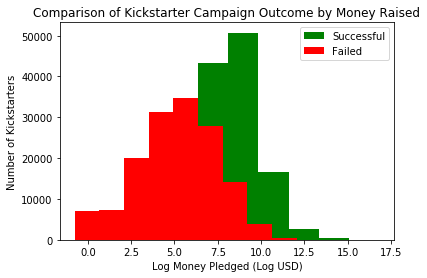

In [51]:
plt.hist(pledged_success, color = "green", label = "Successful")
plt.hist(pledged_failed, color = "red", label = "Failed")
plt.title("Comparison of Kickstarter Campaign Outcome by Money Raised")
plt.xlabel("Log Money Pledged (Log USD)")
plt.ylabel("Number of Kickstarters")
plt.legend()
plt.show()

In [60]:
ttest_ind(success["usd pledged_log"], failed["usd pledged_log"])

Ttest_indResult(statistic=383.77123327415717, pvalue=0.0)

This visualization seems to convey that when Kickstarters succeed, they succeed by a significant margin when comapared to their failed peers.

### Comparison of Kickstarter Campaign Outcome by USD Pledged

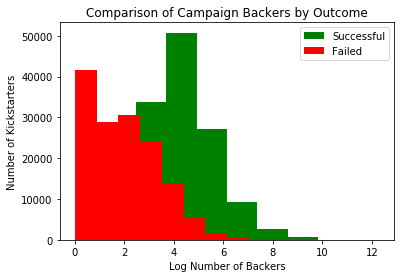

In [146]:
backers_success = success["backers_log"]
backers_failed = failed["backers_log"]
plt.hist(backers_success, color = "green", label = "Successful")
plt.hist(backers_failed, color = "red", label = "Failed")
#plt.xlim(0)
plt.title("Comparison of Campaign Backers by Outcome")
plt.xlabel("Log Number of Backers")
plt.ylabel("Number of Kickstarters")
plt.legend()
plt.show()

The interpertation here is quite apparent: the more backers one has, the more successful the Kickstarter will most likely be.

### Comparison of Kickstarter Campaign Outcome by Length of Campaign

In [57]:
duration_success = success["duration"]
duration_failure = failed["duration"]

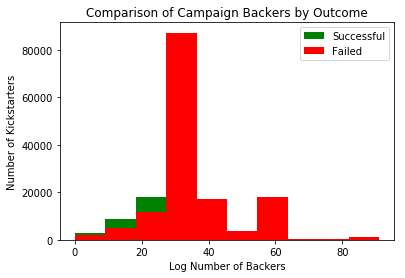

In [58]:
plt.hist(duration_success, color = "green", label = "Successful")
plt.hist(duration_failure, color = "red", label = "Failed")
plt.title("Comparison of Campaign Backers by Outcome")
plt.xlabel("Log Number of Backers")
plt.ylabel("Number of Kickstarters")
plt.legend()
plt.show()

In [62]:
ttest_ind(success["duration"], failed["duration"])

Ttest_indResult(statistic=-68.07134641755854, pvalue=0.0)

In [64]:
print(success["duration"].mean())
failed["duration"].mean()

31.168482274038716


34.380227099028275

Not a big difference here, despite the outcome of the two sample t test. The reason why we obtained a signficant result was mostly likely because of the high sample sizes for each outcome. In reality, the difference is about 3 days.

### Comparison of Kickstarter Outcome by Time of the Year

In [227]:
alt.Chart(kickstarter_sample).mark_bar().encode(
    alt.X("state:N"),
    alt.Y("count(*):Q"),
    alt.Column("season_number:N"),
    color = alt.Color("state:N", scale = alt.Scale(range=["red", "green"]))   
)

<VegaLite 2 object>

We can observe that in the summer (encoded as 3 here) there is the largest difference out of the seasons between failed and successful Kickstarters.

In [226]:
alt.Chart(kickstarter_sample).mark_bar().encode(
    alt.X("state:N"),
    alt.Y("count(*):Q"),
    column = "month_number:N",
    color = alt.Color("state:N", scale = alt.Scale(range=["red", "green"])),
)

<VegaLite 2 object>

December and January as well as the summer months seem to demonstrate a large difference between failures and successes. In particular, there are more failures than successes.